<a href="https://colab.research.google.com/github/HST0077/Financial-Engineering-Python/blob/main/Quantlib01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

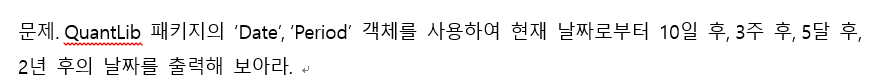

In [6]:
# QuantLib 설치
!pip install QuantLib-Python

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [3]:
from QuantLib import Date
import datetime

# 현재 날짜 설정 방법 1 (datetime 이용)
current_date = datetime.date.today()

# QuantLib의 Date 객체로 변환
ql_current_date = Date(current_date.day,
                       current_date.month,
                       current_date.year)
print(ql_current_date)

April 9th, 2024


In [5]:
# Date object 사용법 Date(날짜, 월, 년도)
import QuantLib as ql
date=ql.Date(18,3,2024)
print(date)

March 18th, 2024


In [6]:
# 현재 날짜 설정 방법 2 (QuantLib이용)
import QuantLib as ql
ql_current_date=ql.Date.todaysDate()
print(ql_current_date)

April 9th, 2024


In [7]:
from QuantLib import Period, Weeks, Months, Years
# Period module 이용
# Period는 단순 날짜 계산만 한다. 즉, 영업일 고려 없음
print('Add 10 days:',date+10)
print('Add 3 weeks:',date+Period(3,Weeks))
print('Add 5 months:',date+Period(5,Months))
print('Add 2 years: ',date+Period(2,Years))

Add 10 days: March 28th, 2024
Add 3 weeks: April 8th, 2024
Add 5 months: August 18th, 2024
Add 2 years:  March 18th, 2026


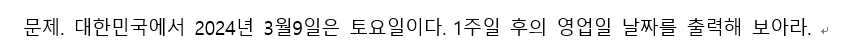

In [8]:
import QuantLib as ql
# 2년 후의 대한민국 영업일 기준 날짜
kr_cal=ql.SouthKorea() # 대한민국 캘린더 설정
date=ql.Date(9,3,2024)
period=ql.Period(1, Weeks) # 1주일 시간간격 설정
# ql.Preceding으로 지정하지 않으면 직전 영업일로 이동
# ql.Following (직후 영업일 출력, 디폴트값)
kr_date_preceding=kr_cal.advance(date,period,ql.Preceding)
kr_date_following=kr_cal.advance(date,period)
print('1주일후 직전 영업일 날짜:',kr_date_preceding)
print('1주일후 직후 영업일 날짜:',kr_date_following)

1주일후 직전 영업일 날짜: March 15th, 2024
1주일후 직후 영업일 날짜: March 18th, 2024


In [10]:
date=ql.Date(30,5,2024)
period=ql.Period(1, ql.Months)
kr_date_following=kr_cal.advance(date,period,ql.Following)
'''
계약 날짜가 비영업일로 이동될 때 해당 월을 넘어가는 경우,
대신 이전 영업일로 날짜가 조정됨
즉, ql.ModifiedFollowing은 월을 넘기지 않는 범위 내에서
 다음 영업일로 날짜를 이동시킵니다.
'''
kr_date_Mfollowing=kr_cal.advance(date,period,ql.ModifiedFollowing)
print('1달후 영업일 날짜:',kr_date_following)
print('1달후 영업일 날짜:',kr_date_Mfollowing)

1달후 영업일 날짜: July 1st, 2024
1달후 영업일 날짜: June 28th, 2024


In [12]:
# 대한민국에서 주어진 날짜의 영업일 수 계산
date=ql.Date(9,3,2024)
T_date=Date(9,3,2025)
kr_biz_days=kr_cal.businessDaysBetween(date,T_date)
print(date, '에서 ', T_date, '까지의 영업일수: ', kr_biz_days)

March 9th, 2024 에서  March 9th, 2025 까지의 영업일수:  242


In [13]:
# 주의할 점
today = ql.Date(29,3,2024)
# 날짜 객체로 생성
ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱
kr_cal=ql.SouthKorea()

print('현재 날짜:',today)
dD=ql.Period(1,ql.Days)
D1=today+dD
print('하루 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 하루 후 날짜:',D2)

현재 날짜: March 29th, 2024
하루 후 날짜: March 30th, 2024
캘린더 상 하루 후 날짜: April 1st, 2024


In [14]:
# 한 달 후 날짜
dD=ql.Period(1,ql.Months)
D1=today+dD
print('1개월 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 1개월 후 날짜:',D2)

1개월 후 날짜: April 29th, 2024
캘린더 상 1개월 후 날짜: April 29th, 2024


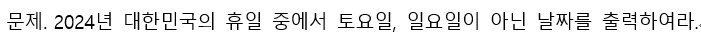

In [15]:
t1=ql.Date(1,3,2024)
t2=ql.Date(30,4,2024)
kr_cal.holidayList(t1,t2)

(Date(1,3,2024), Date(10,4,2024))

In [16]:
t1=ql.Date(1,1,2024)
t2=ql.Date(31,12,2024)
kr_cal.holidayList(t1,t2)

(Date(1,1,2024),
 Date(9,2,2024),
 Date(12,2,2024),
 Date(1,3,2024),
 Date(10,4,2024),
 Date(1,5,2024),
 Date(6,5,2024),
 Date(15,5,2024),
 Date(6,6,2024),
 Date(15,8,2024),
 Date(16,9,2024),
 Date(17,9,2024),
 Date(18,9,2024),
 Date(3,10,2024),
 Date(9,10,2024),
 Date(25,12,2024),
 Date(31,12,2024))

In [17]:
Date(15,8,2024).weekday()

5

In [18]:
import datetime
datetime.date(2024, 8, 15).strftime('%A')

'Thursday'

In [19]:
import QuantLib as ql

# 한국 달력 생성
kr_cal = ql.SouthKorea()

# 2020년부터 2030년까지의 날짜 설정
start_date = ql.Date(1, 1, 2020)
end_date = ql.Date(31, 12, 2030)

# 휴일 개수 리턴
Ncal=len(kr_cal.holidayList(start_date,end_date))

# 토요일과 일요일이 아닌 휴일 출력
non_weekend_holidays = [date for date in kr_cal.holidayList(start_date, end_date)
                        if date.weekday() not in [7, 1]]

print("2020년부터 2030년까지의 휴일 개수:",Ncal)
print("2020년부터 2030년까지의 휴일 개수 중 주말 제외:",len(non_weekend_holidays))

2020년부터 2030년까지의 휴일 개수: 167
2020년부터 2030년까지의 휴일 개수 중 주말 제외: 167


In [20]:
t1=ql.Date(1,3,2024)
t2=ql.Date(30,4,2024)
kr_cal.businessDaysBetween(t1,t2)

40

In [21]:
# 임시휴일을 추가해 보자
kr_cal.addHoliday(Date(11,4,2024))
kr_cal.businessDaysBetween(t1,t2)

39

In [22]:
# 특정 휴일 삭제
kr_cal.removeHoliday(Date(11,4,2024))
kr_cal.businessDaysBetween(t1,t2)

40

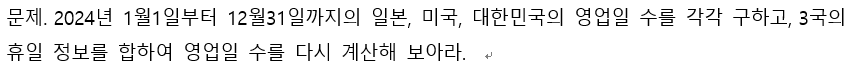

In [23]:
import QuantLib as ql

# 캘린더 정보 읽어오기
jpn_cal=ql.Japan()
kr_cal=ql.SouthKorea()
# 미국은 NYSE,SOFR 등 기초자산에 따라
# 추가 매개변수 지정 필요
us_cal=ql.UnitedStates(ql.UnitedStates.SOFR)

In [24]:
# 각 나라의 거래 휴일을 결합시켜보자
D1=ql.Date(1,1,2024)
D2=ql.Date(31,12,2024)
J_cal=ql.JointCalendar(jpn_cal, us_cal, kr_cal)

print('일본의 영업일수:{0}'.format(jpn_cal.businessDaysBetween(D1,D2)))
print('미국의 영업일수:{0}'.format(us_cal.businessDaysBetween(D1,D2)))
print('대한민국의 영업일수:{0}'.format(kr_cal.businessDaysBetween(D1,D2)))
print('3국의 결합 영업일수:{0}'.format(J_cal.businessDaysBetween(D1,D2)))

일본의 영업일수:245
미국의 영업일수:249
대한민국의 영업일수:245
3국의 결합 영업일수:224


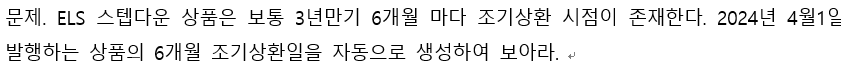

In [25]:
#2024년 4월 1일부터 3년 6개월 스텝다운 날짜 생성하기
from QuantLib import Date, Period, SouthKorea, Schedule
from QuantLib import Following, DateGeneration, Months

effective_date=Date(1,4,2024) # 유효시작날짜
termination_date=Date(1,4,2027) # 만기날짜
tenor=Period(6,Months) # 6개월마다
calendar=SouthKorea() # 대한민국 달력사용
business_convention=Following # 휴일과 겹치면 다음 영업일
termination_business_convention=Following # 만기날짜가 휴일이면 다음 영업일
# DateGeneration.forward면 시작날짜부터 tenor마다 뒤로 가면서 날짜를 찾는 것이고
# backward면 만기날짜부터 tenor마다 앞으로 오면서 날짜를 찾는 것임
date_generation=DateGeneration.Forward
end_of_month=False # True면 날짜의 달의 마지막 날짜로 조정

ss=Schedule(effective_date,
            termination_date,
            tenor,
            calendar,
            business_convention,
            termination_business_convention,
            date_generation,
            end_of_month)

In [26]:
for i,date in enumerate(ss):
    # i는 순서 (0부터 시작)
    # d는 ss에 들어 있는 날짜
    print(i+1,date)

1 April 1st, 2024
2 October 1st, 2024
3 April 1st, 2025
4 October 1st, 2025
5 April 1st, 2026
6 October 1st, 2026
7 April 1st, 2027


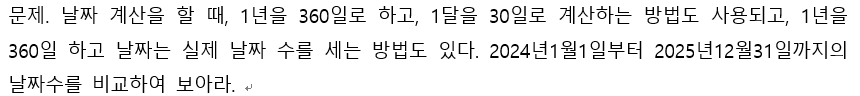

In [27]:
import QuantLib as ql

# Actual/360 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
start_date = ql.Date(1, 1, 2024)
end_date = ql.Date(31, 12, 2025)
actual360 = ql.Actual360()

days_actual360 = actual360.dayCount(start_date, end_date)
print("Actual/360로 계산된 날짜 간의 차이:", days_actual360)

# 30/360 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
thirty360 = ql.Thirty360(ql.Thirty360.European)

days_thirty360 = thirty360.dayCount(start_date, end_date)
print("30/360으로 계산된 날짜 간의 차이:", days_thirty360)

Actual/360로 계산된 날짜 간의 차이: 730
30/360으로 계산된 날짜 간의 차이: 719


In [28]:
# Actual/Actual 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
actual_actual = ql.ActualActual(ql.ActualActual.ISMA)

days_actual_actual = actual_actual.dayCount(start_date, end_date)
print("Actual/Actual로 계산된 날짜 간의 차이:", days_actual_actual)

Actual/Actual로 계산된 날짜 간의 차이: 730


In [29]:
# 금리 계산
annual_interest_rate = 0.20

start_date = ql.Date(1, 1, 2024)
end_date = ql.Date(15, 7, 2025)

# ActualActual을 사용하여 연간 이자 계산
actual_actual_day_counter =ql.ActualActual(ql.ActualActual.ISMA)
actual_actual_interest = annual_interest_rate * actual_actual_day_counter.yearFraction(start_date, end_date)
print("ActualActual을 사용한 연간 이자:", actual_actual_interest)

# Actual/365를 사용하여 연간 이자 계산
actual_365_day_counter = ql.Actual365Fixed()
actual_365_interest = annual_interest_rate * actual_365_day_counter.yearFraction(start_date, end_date)
print("Actual/365을 사용한 연간 이자:", actual_365_interest)

# Thirty360을 사용하여 연간 이자 계산
thirty360_day_counter = ql.Thirty360(ql.Thirty360.BondBasis)
thirty360_interest = annual_interest_rate * thirty360_day_counter.yearFraction(start_date, end_date)
print("Thirty360을 사용한 연간 이자:", thirty360_interest)

# Actual/360을 사용하여 연간 이자 계산
actual_360_day_counter = ql.Actual360()
actual_360_interest = annual_interest_rate * actual_360_day_counter.yearFraction(start_date, end_date)
print("Actual/360을 사용한 연간 이자:", actual_360_interest)

ActualActual을 사용한 연간 이자: 0.30000000000000004
Actual/365을 사용한 연간 이자: 0.30739726027397263
Thirty360을 사용한 연간 이자: 0.3077777777777778
Actual/360을 사용한 연간 이자: 0.3116666666666667


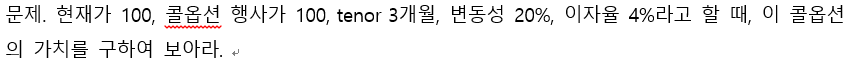

In [1]:
# MonteCarlo Simulation을 이용한 직접코딩
# 함수로 작성
def vanillaMC_call(S,K, r,sig,T,sim):
    # S: 현재가
    # K: 행사가격
    # T: 만기(in years)
    # r: 이자율 (연 1%면 0.01로)
    # sig: 연변동성 (30%라면 0.3으로)

    import cupy as cp
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    # 랜덤 시드 설정
    cp.random.seed(77)
    N_intervals=352 # 1년을 352로 세팅
    N = int(T * N_intervals)  # 만기를 감안한 시간간격의 갯수
    dt=T/N # 시간간격
    s = cp.sqrt(1 / N_intervals)  # 분산을 표준편차화

    # N(0,s)을 따르는 [N, sim] 크기의 정규난수 생성
    dW = cp.random.normal(0, s, size=(N, sim))
    pars=(r-0.5*sig*sig)*dt+sig*dW
    exp_pars=cp.exp(pars)

    # 추가할 행 생성
    S0 = S*cp.ones((1, dW.shape[1]), dtype=dW.dtype)
    W = cp.vstack([S0, exp_pars]) # (N+1,sim)의 행렬로 만든다.

    # 시간에 따른 주가행렬 완성
    S=cp.cumprod(W,axis=0) # 행으로 계속 누적곱셈으로 행렬 생성

    # 옵션 payoff
    option=cp.maximum(S[-1]-K,0) # 콜옵션
    price=cp.mean(cp.exp(-r*T)*option)
    return price

In [3]:
def Greeks(S,K, r,sig,T,sim):
    dp=S*0.01
    P0=vanillaMC_call(S,K, r,sig,T,sim)
    Pup=vanillaMC_call(S+dp,K, r,sig,T,sim)
    Pdn=vanillaMC_call(S-dp,K, r,sig,T,sim)
    delta= (Pup-Pdn)/(2*dp)
    gamma=(Pup-2*P0+Pdn)/(dp*dp)
    Pv=vanillaMC_call(S,K, r,sig+0.01,T,sim)
    vega=Pv-P0
    Pr=vanillaMC_call(S,K, r+0.0001,sig,T,sim)
    rho=Pr-P0
    Pt=vanillaMC_call(S,K, r,sig,T-1/365,sim)
    theta=Pt-P0
    print('델타:',delta)
    print('감마:',gamma)
    print('1% 베가:',vega)
    print('1bp 르호:',rho)
    print('1Day 세타:',theta)

In [2]:
vanillaMC_call(100,100,0.01,0.2,0.25,500000)

array(4.12719188)

In [4]:
Greeks(100,100,0.01,0.2,0.25,500000)

델타: 0.5309221014410783
감마: 0.039502027067146894
1% 베가: 0.19987680607094038
1bp 르호: 0.0012244365829880977
1Day 세타: -0.024700442997791505


In [5]:
# QuantLib 이용
import QuantLib as ql
import datetime

today=datetime.date.today() # 현재 시스템 날짜
# 날짜 객체로 생성
today=ql.Date(today.day, today.month, today.year)
ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱

ModuleNotFoundError: No module named 'QuantLib'